## Tensor Type

In [63]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# Setup memory to fix critical issue
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [7]:
tf.constant(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [8]:
tf.constant(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [9]:
tf.constant(2.2, dtype=tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=2.2>

In [10]:
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [11]:
tf.constant('Hello')

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>

## TF CPU & GPU

for a constant

In [12]:
a=tf.constant(1)

In [13]:
a.device

'/job:localhost/replica:0/task:0/device:CPU:0'

For a calculation func

In [20]:
b=tf.range(4)
print(b.device)

Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
/job:localhost/replica:0/task:0/device:GPU:0


In [16]:
x = tf.random.uniform([3, 3])
x.device

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


'/job:localhost/replica:0/task:0/device:GPU:0'

### Tensor and numpy

In [21]:
b.numpy()

array([0, 1, 2, 3])

In [22]:
b.shape

TensorShape([4])

In [25]:
tf.rank(b)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [26]:
tf.is_tensor(b)

True

In [27]:
b.dtype

tf.int32

In [30]:
a = np.arange(10)

In [32]:
aa=tf.convert_to_tensor(a, dtype=tf.int32)

In [33]:
tf.cast(aa, dtype=tf.float64)

Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])>

In [35]:
tf.cast(aa, dtype=tf.int32)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [36]:
tf.cast(aa, dtype=tf.bool)

Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

### Variable

In [37]:
a=tf.range(5)

Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0


In [38]:
b=tf.Variable(a)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [39]:
b.trainable

True

In [40]:
isinstance(b, tf.Tensor)

False

In [41]:
isinstance(b, tf.Variable)

True

In [42]:
tf.is_tensor(b)

True

In [43]:
b.numpy()

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0


array([0, 1, 2, 3, 4])

In [44]:
a=tf.ones([])
a.numpy()

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


1.0

In [45]:
int(a)

1

In [46]:
float(a)

1.0

### Create new tensors

In [47]:
tf.zeros([])

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [48]:
tf.zeros([2,2])

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [54]:
d=tf.zeros([2,2,2,2])
d

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [50]:
tf.ones([])

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [53]:
tf.ones_like(d)

Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]],


       [[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]]], dtype=float32)>

In [55]:
tf.fill([2,2], 1)

Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]])>

### distribution

In [56]:
tf.random.normal([2,2], mean=1, stddev=1)

Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.9713406, 1.7564361],
       [2.8834624, 2.6687245]], dtype=float32)>

In [72]:
def draw_scatter(d2_tensor):
    # Plot
    data = d2_tensor.numpy()
    plt.scatter(data[0], data[1], marker='.')
    plt.title('Scatter')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Executing op RandomStandardNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0


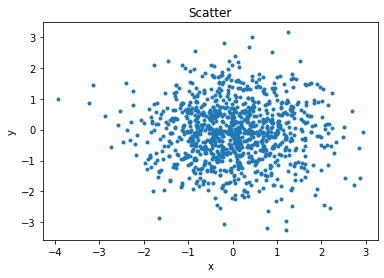

In [88]:
normal_x = tf.random.normal([2,1000])
draw_scatter(normal_x)

Executing op TruncatedNormal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0


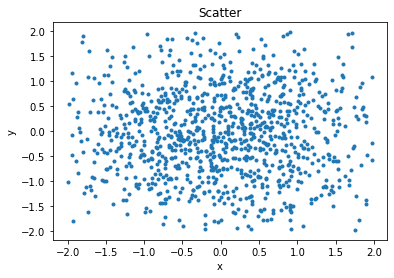

In [89]:
truncated_x = tf.random.truncated_normal([2,1000], mean=0, stddev=1)
draw_scatter(truncated_x)

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0


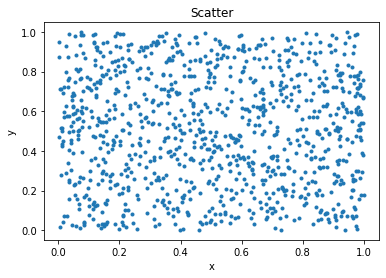

In [90]:
uniform_x = tf.random.uniform([2,1000], minval=0, maxval=1)
draw_scatter(uniform_x)

In [91]:
idx = tf.range(10)
idx = tf.random.shuffle(idx)
idx

Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomShuffle in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([5, 0, 2, 6, 8, 4, 1, 9, 7, 3])>

### Loss example

In [92]:
out = tf.random.uniform([4, 10])
y = tf.range(4)
y = tf.one_hot(y, depth=10)
loss = tf.keras.losses.mse(y, out)
loss = tf.reduce_mean(loss)
loss

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Range in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op OneHot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op SquaredDifference in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(), dtype=float32, numpy=0.32305926>